# Moist vs Pseudo-adiabats

In this notebook, we will compute moist vs pseudo-adiabats, we will plot them and explore differences based on specific assumptions on the sfc temperature and moisture content. 



In [19]:
# packages needed in the notebook
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units

# define constants
Lv=2.5e6
Rv=461.5
Rd = 287.
T0 = 273.16
cpd = 1003.
cpv = 1864.
cpl = 4184.
g = 9.81
eps = Rd/Rv
print(es0)


6.11


Now compute the saturation vapor pressure using the Bolton's formula

$ e_s = e_{s0} \exp \big [ - \frac{L_v}{R_v}  \big( \frac{1}{T} - \frac{1}{T_0} \big ) \big ]$

and once we know es, we can compute the saturation specific humidity as

$q_s = \varepsilon \frac{e_s(T)}{p}$

In [11]:
#define p range
p = np.arange(1000.,90.,-1)
N = len(p)
z_p = mpcalc.pressure_to_height_std(p* units.hPa)
z = z_p.magnitude


6.11


In [10]:
# now let's compute the saturation vapor pressure for a sfc T of 288K
def es(T,fac=0.14):
    return es0*np.exp(-Lv/Rv*(1./T -1./T0))

T_min = 100.
T_max = 320.
delta_T = (T_max - T_min)/N

T = np.arange(T_min,T_max,delta_T)

Ts = 300
p_sfc = p[0]
print (es0)

6.11


Text(0, 0.5, 'es (hPa)')

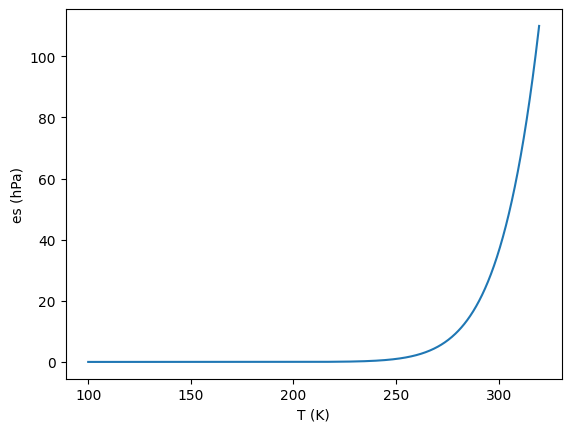

In [9]:
#plot es
fig,ax=plt.subplots()
ax.plot(T,es(T))
ax.set_xlabel("T (K)")
ax.set_ylabel("es (hPa)")

In [12]:
RH = 0.8
#now evaluate the surface vapor pressure and with it parcel specific humidity 
e_sfc = RH*es(Ts)
qt = eps*e_sfc/p_sfc
print(qt)
qd = 1 -qt

0.01792190577604704


now let's define the saturated lapse rate as we did in class

$ \Gamma_s = \frac{g}{\widetilde{c_p}}$ with 

$ \widetilde{c_p} = \big [ q_d c_{pd} + q_s c_{pv} + q_l c_{pl }  + \frac{q_s L_v^2}{R_v T^2} \big(1 + \frac{q_sR_v}{R_d}\big)\big]/\big[1 + \frac{q_sL_v}{R_dT}\big]$

and the pseudo-adiabatic lapse rate as

$\Gamma_{pa} = \frac{g}{\widetilde{c_p(q_l = 0})}$



In [13]:
# compute dewpoint temperature
Td = mpcalc.dewpoint_from_relative_humidity(Ts * units.degK, RH*100 * units.percent)
p_lcl,t_lcl = mpcalc.lcl(1000 * units.hPa, Ts * units.degK, Td)
print(t_lcl)
print(p_lcl)

295.36447626200544 kelvin
946.9553946614271 hectopascal


In [14]:
#now define the temperature of a parcel that is raised along a saturated and reversible adiabatic process (T_s)
#and that of a parcel raised on a pseudo-adiabatic process

T_s = np.tile(0.,N)
T_pa = np.tile(0.,N)
#qs_s = np.tile(0,N)
#qs_pa = np.tile(0,N)
#gamma_s = np.tile(0.,N)
#gamma_pa = np.tile(0.,N)
#cp_s = gamma_s
#cp_pa = gamma_pa

T_s[0] = Ts
T_pa[0] = Ts



In [15]:
for j in range(1,N):
    if(p[j] >= p_lcl.magnitude):
        T_s[j] = T_s[j-1] - g/cpd*1000*(z[j] - z[j-1])
        T_pa[j] = T_pa[j-1] - g/cpd*1000*(z[j] - z[j-1])
    else:
        es_s = es(T_s[j-1])
        qs_s = eps*es_s/p[j-1]
        cp_s = (qd*cpd + qs_s*cpv + (qt-qs_s)*cpl + qs_s*Lv**2/(Rv*T_s[j-1]**2)*(1 + qs_s*Rv/Rd))/ (1 + qs_s*Lv/(Rd*T_s[j-1]))                                                                                             
        gamma_s = g/cp_s
        T_s[j] = T_s[j-1] - gamma_s*1000*(z[j] - z[j-1])
        
        es_pa = es(T_pa[j-1])
        qs_pa = eps*es_pa/p[j-1]
        cp_pa= (qd*cpd + qs_pa*cpv + qs_pa*Lv**2/(Rv*T_pa[j-1]**2)*(1 + qs_pa*Rv/Rd))/ (1 + qs_pa*Lv/(Rd*T_pa[j-1]))                                                                                             
        gamma_pa = g/cp_pa
        T_pa[j] = T_pa[j-1] - gamma_pa*1000*(z[j] - z[j-1])   
      
        
       

In [16]:
#plot Temperature profile
#fig,ax=plt.subplots()
#ax.plot(T_s,p)
#ax.invert_yaxis()
#ax.set_xlabel("T (K)")
#ax.set_ylabel("es (hPa)")


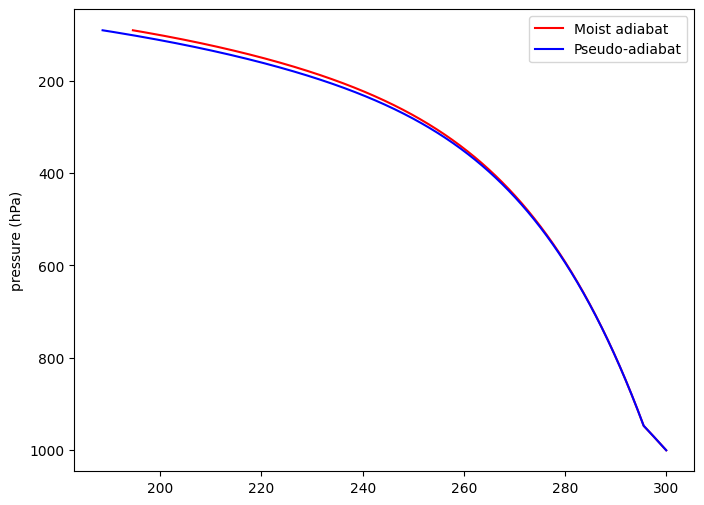

In [18]:

fig,ax=plt.subplots(figsize=(8,6))
ax.set_ylabel("pressure (hPa)")
ax.invert_yaxis()
ax.plot(T_s,p, color = 'red', label = 'Moist adiabat')
ax.plot(T_pa, p, color = 'blue', label = 'Pseudo-adiabat')
ax.legend()
plt.show()